In [1]:
import pandas as pd, pickle, matplotlib.pyplot as plt

In [2]:
with open('covid_data.p','rb') as f:
    data = pickle.load(f)

In [3]:
def plotStateTotals(df, sum_col, plot_col, min_deaths):
    df = df[df['date'] == df.date.max()]
    df = df[df[sum_col]>=min_deaths]
    df = df.groupby(['state_code'])[
        [sum_col, 'pop_total']].agg('sum').sort_values(by=[sum_col], ascending=False).reset_index()
    df[sum_col+'_per_100k'] = df[sum_col] * 100000 / df['pop_total']
    
    plt.figure(figsize=(15,6))
    plt.bar(df.index, df[plot_col], width=0.75)
    plt.xticks(df.index,df.state_code)
    plt.ylabel(plot_col)
    plt.show()

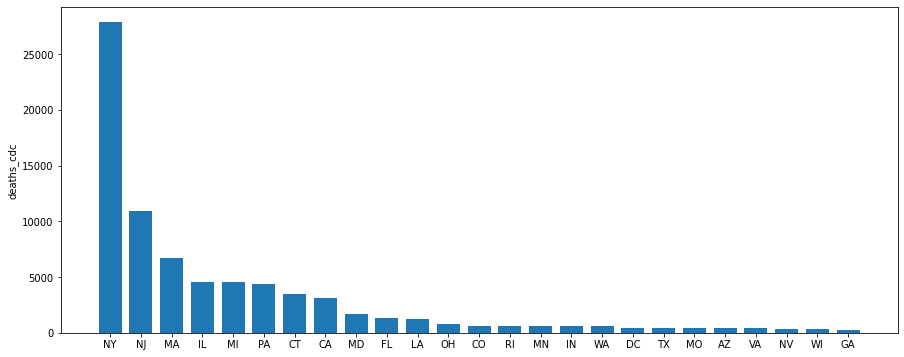

In [4]:
plotStateTotals(data, 'deaths_cdc', 'deaths_cdc', 200)

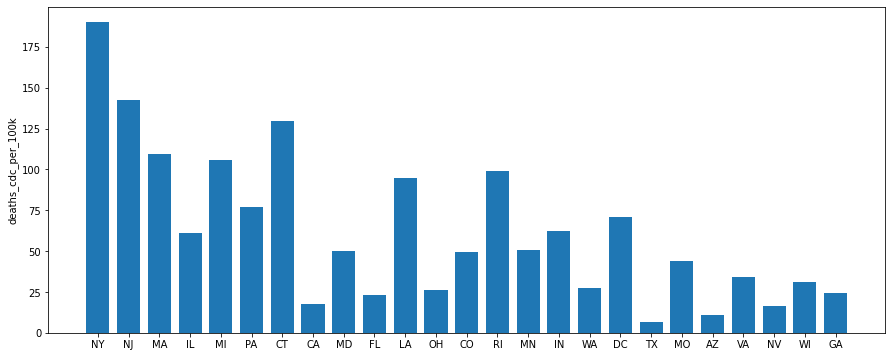

In [5]:
plotStateTotals(data, 'deaths_cdc', 'deaths_cdc_per_100k', 200)